In [35]:
import pandas
import seaborn
import numpy
from scipy import stats
import statsmodels.formula.api as smf

# Úkol 3

### Vytvoř regresní model, jehož úkolem bude zjistit, které faktory ovlivňují průměrnou délku života.

In [36]:
data = pandas.read_csv("Life-Expectancy-Data-Updated.csv")
data.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


1. Vyber data pro jeden konkrétní rok (např. pro rok 2015).

In [37]:
data_2015 = data[data["Year"] == 2015]
data_2015.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
6,Russian Federation,Rest of Europe,2015,6.6,8.2,223.0000,8.06,97,97,26.2,...,97,0.08,9313,144.10,2.3,2.3,12.0,0,1,71.2
27,Cameroon,Africa,2015,57.0,88.0,340.1265,4.55,84,64,24.3,...,84,1.12,1383,23.30,5.6,5.5,6.1,0,1,57.6
43,"Gambia, The",Africa,2015,39.7,59.8,261.7065,2.69,97,64,23.9,...,97,0.96,661,2.09,7.3,7.2,3.4,0,1,60.9


2. Vysvětlovaná proměnná (y) = Life_expectancy
3. Délku dožití určitě bude ovlivňovat bohatství země, které lze vyjádřit ve hrubém domácím produktu na hlavu. Začni s modelem, který má jako vysvětlující proměnnou sloupec GDP_per_capita (hrubý domácí produkt na hlavu v dolarech).
4. Zobraz výsledek jako graf.
5. Dále si zobraz tabulku s využitím metody využitím modulu scipy a metody summary() a zjisti koeficient determinace.

<AxesSubplot: xlabel='GDP_per_capita', ylabel='Life_expectancy'>

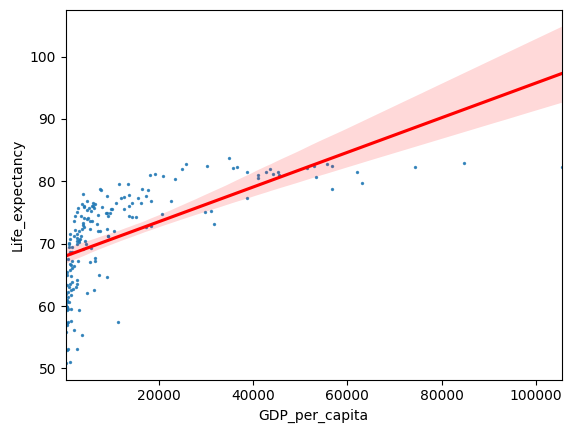

In [38]:
seaborn.regplot(data=data_2015, x="GDP_per_capita", y="Life_expectancy", line_kws={"color": "r"}, scatter_kws={"s" : 2})

Logaritmická transformace dat

In [39]:
data_2015["GDP_per_capita_log"] = numpy.log(data_2015["GDP_per_capita"])
data_2015[["Country", "GDP_per_capita", "GDP_per_capita_log", "Life_expectancy"]]

C:\Users\klama\AppData\Local\Temp\ipykernel_26188\2380853873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2015["GDP_per_capita_log"] = numpy.log(data_2015["GDP_per_capita"])


,Country,GDP_per_capita,GDP_per_capita_log,Life_expectancy
0,Turkiye,11006,9.306196,76.5
1,Spain,25742,10.155879,82.8
6,Russian Federation,9313,9.139167,71.2
27,Cameroon,1383,7.232010,57.6
43,"Gambia, The",661,6.493754,60.9
...,...,...,...,...
2753,Tunisia,4095,8.317522,75.9
2820,"Venezuela, RB",17318,9.759502,72.6
2840,Djibouti,2653,7.883446,64.1
2846,Nicaragua,2050,7.625595,73.6


<AxesSubplot: xlabel='GDP_per_capita_log', ylabel='Life_expectancy'>

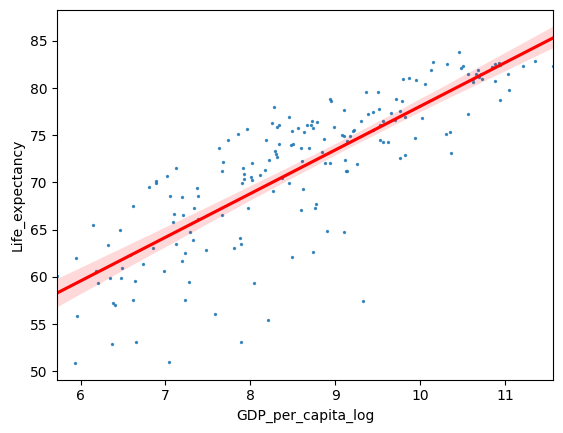

In [40]:
seaborn.regplot(data=data_2015, x="GDP_per_capita_log", y="Life_expectancy", line_kws={"color": "r"}, scatter_kws={"s" : 2})

In [41]:
formula = "Life_expectancy ~ GDP_per_capita_log"
mod = smf.ols(formula, data_2015)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     363.8
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           8.66e-45
Time:                        18:53:25   Log-Likelihood:                -521.96
No. Observations:                 179   AIC:                             1048.
Df Residuals:                     177   BIC:                             1054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             31.8198      2.106     15.112      0.000      27.665      35.975
GDP_per_capita_log     4.6241      0.242     19.072      0.000       4.146       5.103
==============================================================================
Omnibus:                       37.717   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.324
Skew:                          -1.105   Prob(JB):                     7.96e-14
Kurtosis:                       4.789   Cond. No.                         55.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

koeficient determinace (R-squared) = 0.673, to znamená, že nás model je na 67,3 % přesný (před transformací pouze 39,6 %)

6. Do modelu přidej následující sloupce:
- Schooling - průměrná délka studia (v letech):    ano+
- Incidents_HIV - nákazy virem HIV (počet případů na osobu):    ano-
- Diphtheria - procento populace očkované proti záškrtu:     ano+
- Polio - procento populace očkované proti dětské obrně:     ano+
- BMI - průměrný BMI index populace     ano
- Measles - procento populace očkované proti spalničkám:    ano+

U každého sloupce se zamysli nad tím, jestli může délku života výrazně ovlivnit a jaké tipuješ znaménko koeficientu (kladné - zvyšuje délku života, záporné - snižuje délku života).

In [42]:
formula = "Life_expectancy ~ GDP_per_capita_log + Schooling + Incidents_HIV + Diphtheria + Polio + BMI + Measles"
mod = smf.ols(formula, data_2015)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     120.8
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           9.01e-63
Time:                        18:53:42   Log-Likelihood:                -462.41
No. Observations:                 179   AIC:                             940.8
Df Residuals:                     171   BIC:                             966.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             28.6562      3.767      7.607      0.000      21.220      36.093
GDP_per_capita_log     2.7827      0.310      8.988      0.000       2.172       3.394
Schooling              0.4397      0.145      3.039      0.003       0.154       0.725
Incidents_HIV         -1.4143      0.155     -9.126      0.000      -1.720      -1.108
Diphtheria            -0.0350      0.046     -0.757      0.450      -0.126       0.056
Polio                  0.1641      0.054      3.040      0.003       0.058       0.271
BMI                    0.1586      0.144      1.103      0.271      -0.125       0.442
Measles                0.0083      0.021      0.405      0.686      -0.032       0.049
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                5.610
Skew:                          -0.413   Prob(JB):                       0.0605
Kurtosis:                       3.265   Cond. No.                     2.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Sestav model z vybraných sloupců a proveď následující kroky:

7. Formuluj hypotézu o normalitě reziduí a otestuj ji s využitím modulu scipy a metody summary(). Jaký je výsledek - mají rezidua normální rozdělení?
- Hypotézy o normalitě dat:

        H0: Data mají normální rozdělení.

        H1: Data nemají normální rozdělení.

- p hodnota: Prob(Omnibus) = 0.050; Prob(JB) = 0.0605
- Nezamítáme H0 = nezamítáme, že data nemají normální rozdělení.


C:\Users\klama\AppData\Local\Temp\ipykernel_26188\158726919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2015["residuals"] = res.resid


<AxesSubplot: ylabel='Density'>

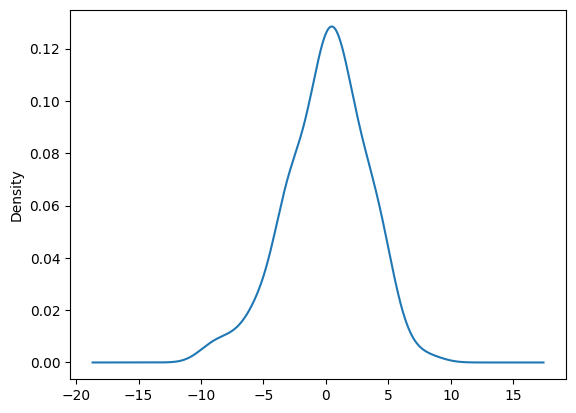

In [44]:
data_2015["residuals"] = res.resid
data_2015["residuals"].plot.kde()

8. Jaký je koeficient determinace výsledného modelu. Porovnej ho s koeficientem determinace, který vyšel z modelu, kde byl pouze hrubý domácí produkt. Jak se změnil? A co to znamená?

- Koeficient determinace (R-squared) je teď 0.832, to znamená, že náš model je na 83,2 % přesný. Je tedy o 15,9 % přesnější než model, který počítá pouze s HDP.

9. Pokud jsi nezamítl(a) hypotézu normality, podívej se do sloupce P>|t| a vyber řádek s nejvyšší p-hodnotou. Koeficient pro daný řádek odeber z modelu. Jak se změnila hodnota ostatních koeficientů? Jak se změnil koeficient determinace?

- Nejvyšší hodnota je u sloupce Measles (spalničky) - 0.686
- Když sloupec Measles odebereme z modelu, koeficient determinace je stále stejný (0,832), takže tento sloupec nemá na kvalitu modelu žádný vliv

In [45]:
formula = "Life_expectancy ~ GDP_per_capita_log + Schooling + Incidents_HIV + Diphtheria + Polio + BMI"
mod = smf.ols(formula, data_2015)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     141.5
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           7.86e-64
Time:                        18:54:41   Log-Likelihood:                -462.49
No. Observations:                 179   AIC:                             939.0
Df Residuals:                     172   BIC:                             961.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             28.5933      3.755      7.615      0.000      21.182      36.005
GDP_per_capita_log     2.8054      0.304      9.235      0.000       2.206       3.405
Schooling              0.4446      0.144      3.091      0.002       0.161       0.728
Incidents_HIV         -1.4194      0.154     -9.212      0.000      -1.724      -1.115
Diphtheria            -0.0338      0.046     -0.734      0.464      -0.125       0.057
Polio                  0.1664      0.054      3.107      0.002       0.061       0.272
BMI                    0.1659      0.142      1.166      0.245      -0.115       0.447
==============================================================================
Omnibus:                        5.637   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.250
Skew:                          -0.400   Prob(JB):                       0.0724
Kurtosis:                       3.254   Cond. No.                     1.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Výsledky bez logaritmické transformace:

- model, který počítá pouze s HDP je přesný pouze na 39,6 % (oproti 67,3% přesnosti stejného modelu s log. transformací)
- model, který počítá i s dalšími sloupci je o 4,2 % méně přesný než model s log. transformací
- ani v tomto případě nezamítáme, že rezidua mají normální rozdělení
- statisticky nejméně významný koeficient je sloupec Diphtheria (záškrt), když ho odstarníme, kvalita modelu se nezmění


In [46]:
formula = "Life_expectancy ~ GDP_per_capita"
mod = smf.ols(formula, data_2015)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     116.1
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           3.90e-21
Time:                        18:54:59   Log-Likelihood:                -576.78
No. Observations:                 179   AIC:                             1158.
Df Residuals:                     177   BIC:                             1164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         67.9538      0.561    121.219      0.000      66.848      69.060
GDP_per_capita     0.0003   2.58e-05     10.774      0.000       0.000       0.000
==============================================================================
Omnibus:                       18.171   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.349
Skew:                          -0.846   Prob(JB):                     2.31e-05
Kurtosis:                       3.037   Cond. No.                     2.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
formula = "Life_expectancy ~ GDP_per_capita + Schooling + Incidents_HIV + Polio + BMI + Measles"
mod = smf.ols(formula, data_2015)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     108.0
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.12e-55
Time:                        18:55:02   Log-Likelihood:                -482.14
No. Observations:                 179   AIC:                             978.3
Df Residuals:                     172   BIC:                             1001.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.9505      4.003      9.481      0.000      30.049      45.852
GDP_per_capita     0.0001   1.95e-05      5.594      0.000    7.06e-05       0.000
Schooling          0.8455      0.145      5.844      0.000       0.560       1.131
Incidents_HIV     -1.4129      0.173     -8.179      0.000      -1.754      -1.072
Polio              0.1349      0.026      5.106      0.000       0.083       0.187
BMI                0.4260      0.160      2.661      0.009       0.110       0.742
Measles            0.0389      0.022      1.737      0.084      -0.005       0.083
==============================================================================
Omnibus:                        3.921   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                3.993
Skew:                          -0.348   Prob(JB):                        0.136
Kurtosis:                       2.773   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""